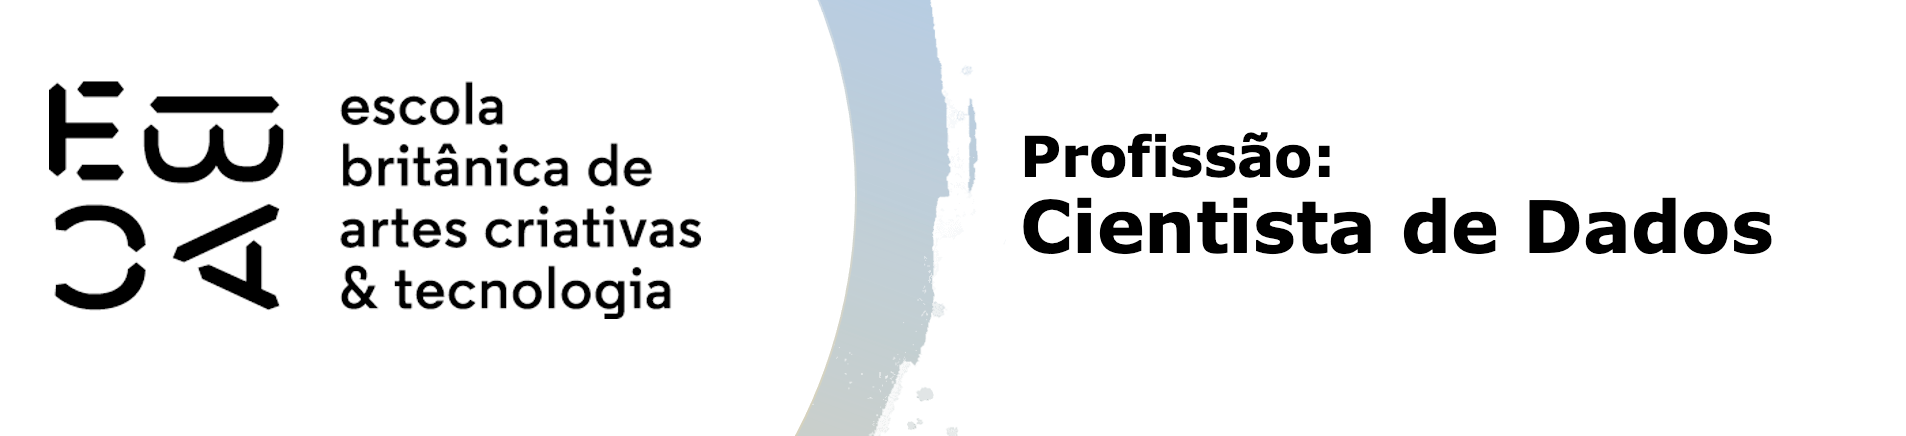

# Regressão III - Tarefa

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
from scipy.interpolate import interp1d

In [137]:
df = pd.read_csv('C:/Users/Arthur/Desktop/EBAC/Curso 3 - Cientista de Dados/Módulo 34 - Regressão III/previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [138]:
df.isnull().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [139]:
media_tempo_emprego = df['tempo_emprego'].mean()
df['tempo_emprego'] = df['tempo_emprego'].fillna(media_tempo_emprego)

In [140]:
df.isnull().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [141]:
df.tail(2)

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2016-03-01,3024,F,S,S,1,Empresário,Superior completo,União,Casa,28,8.219178,3.0,9159.49
2016-03-01,6074,F,N,S,0,Pensionista,Superior completo,Separado,Casa,62,7.746165,1.0,2243.21


In [142]:
df.reset_index(inplace=True)

In [143]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [144]:
data_ultimos_3_meses = df['data_ref'].iloc[-1] - pd.DateOffset(months=3)

In [145]:
dados_teste = df[df['data_ref'] >= data_ultimos_3_meses]
dados_treinamento = df[df['data_ref'] < data_ultimos_3_meses]

In [146]:
dados_teste.head(2)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
550000,2015-12-01,14180,F,S,N,0,Assalariado,Superior completo,Casado,Casa,56,20.887671,2.0,28655.39
550001,2015-12-01,14159,F,S,N,0,Assalariado,Superior completo,Casado,Casa,28,9.460274,2.0,3241.54


In [147]:
dados_treinamento.head(2)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [148]:
#Em vídeo, o professor pediu para fazer o log da renda.

dados_treinamento['log_renda'] = np.log(dados_treinamento['renda'])
dados_teste['log_renda'] = np.log(dados_teste['renda'])

C:\Users\Arthur\AppData\Local\Temp\ipykernel_7580\92771137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_treinamento['log_renda'] = np.log(dados_treinamento['renda'])
C:\Users\Arthur\AppData\Local\Temp\ipykernel_7580\92771137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_teste['log_renda'] = np.log(dados_teste['renda'])


In [149]:
dados_treinamento.head(2)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,9.318131
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,7.793508


In [150]:
print(dados_treinamento.dtypes)

data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                 object
posse_de_imovel                  object
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
log_renda                       float64
dtype: object


In [151]:
encoder = OneHotEncoder(sparse=False)

In [152]:
encoded_cols = pd.DataFrame(encoder.fit_transform(dados_treinamento[colunas_categoricas]))

In [153]:
encoded_cols_names = encoder.get_feature_names(colunas_categoricas)

C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [154]:
encoded_cols.columns = encoded_cols_names

In [155]:
dados_treinamento = pd.concat([dados_treinamento, encoded_cols], axis=1)

In [156]:
dados_treinamento.drop(colunas_categoricas, axis=1, inplace=True)

In [157]:
dados_treinamento.columns

Index(['data_ref', 'index', 'qtd_filhos', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'log_renda', 'sexo_F', 'sexo_M',
       'posse_de_veiculo_N', 'posse_de_veiculo_S', 'posse_de_imovel_N',
       'posse_de_imovel_S', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista',
       'tipo_renda_Empresário', 'tipo_renda_Pensionista',
       'tipo_renda_Servidor público', 'educacao_Fundamental', 'educacao_Médio',
       'educacao_Pós graduação', 'educacao_Superior completo',
       'educacao_Superior incompleto', 'estado_civil_Casado',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo', 'tipo_residencia_Aluguel', 'tipo_residencia_Casa',
       'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário',
       'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'],
      dtype='object')

In [158]:
X = dados_treinamento[['log_renda', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'sexo_F', 'sexo_M', 
                       'posse_de_veiculo_N', 'posse_de_veiculo_S', 'posse_de_imovel_N', 'posse_de_imovel_S', 
                       'tipo_renda_Assalariado', 'tipo_renda_Bolsista', 'tipo_renda_Empresário', 'tipo_renda_Pensionista', 
                       'tipo_renda_Servidor público', 'educacao_Fundamental', 'educacao_Médio', 'educacao_Pós graduação', 
                       'educacao_Superior completo', 'educacao_Superior incompleto', 'estado_civil_Casado', 
                       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União', 'estado_civil_Viúvo', 
                       'tipo_residencia_Aluguel', 'tipo_residencia_Casa', 'tipo_residencia_Com os pais', 
                       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio', 'tipo_residencia_Governamental']]
y = dados_treinamento['renda']

In [159]:
modelo = sm.OLS(y, X)
resultado = modelo.fit()

In [160]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     9918.
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:27:53   Log-Likelihood:            -7.0298e+06
No. Observations:              550000   AIC:                         1.406e+07
Df Residuals:                  549974   BIC:                         1.406e+07
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
log_renda                      2.782e+04    128.238    216.911      0.000    2.76e+04    2.81e+04
qtd_filhos                     2941.3399   2205.618      1.334      0.182   -1381.601    7264.281
idade                           233.9745     15.226     15.367      0.000     204.133     263.816
tempo_emprego                  4630.9938     26.288    176.164      0.000    4579.470    4682.517
qt_pessoas_residencia         -4173.4732   2200.930     -1.896      0.058   -8487.226     140.280
sexo_F                        -5.714e+04    800.862    -71.343      0.000   -5.87e+04   -5.56e+04
sexo_M                        -6.411e+04    803.622    -79.772      0.000   -6.57e+04   -6.25e+04
posse_de_veiculo_N            -5.993e+04    800.050    -74.904      0.000   -6.15e+04   -5.84e+04
posse_de_veiculo_S            -6.132e+04    802.097    -76.444      0.000   -6.29e+04   -5.97e+04
posse_de_imovel_N             -6.151e+04    796.522    -77.226      0.000   -6.31e+04      -6e+04
posse_de_imovel_S             -5.973e+04    804.848    -74.213      0.000   -6.13e+04   -5.82e+04
tipo_renda_Assalariado        -1.209e+04   1014.674    -11.919      0.000   -1.41e+04   -1.01e+04
tipo_renda_Bolsista           -4.881e+04   4290.946    -11.375      0.000   -5.72e+04   -4.04e+04
tipo_renda_Empresário         -1.347e+04   1025.416    -13.140      0.000   -1.55e+04   -1.15e+04
tipo_renda_Pensionista        -3.034e+04   1054.693    -28.765      0.000   -3.24e+04   -2.83e+04
tipo_renda_Servidor público   -1.652e+04   1056.879    -15.636      0.000   -1.86e+04   -1.45e+04
educacao_Fundamental          -2.404e+04   1155.106    -20.810      0.000   -2.63e+04   -2.18e+04
educacao_Médio                -2.894e+04    770.998    -37.530      0.000   -3.04e+04   -2.74e+04
educacao_Pós graduação        -2.064e+04   2966.554     -6.956      0.000   -2.65e+04   -1.48e+04
educacao_Superior completo    -2.749e+04    778.291    -35.327      0.000    -2.9e+04    -2.6e+04
educacao_Superior incompleto  -2.014e+04    890.665    -22.610      0.000   -2.19e+04   -1.84e+04
estado_civil_Casado           -2.394e+04   1609.801    -14.871      0.000   -2.71e+04   -2.08e+04
estado_civil_Separado         -2.745e+04    764.966    -35.878      0.000   -2.89e+04   -2.59e+04
estado_civil_Solteiro         -1.752e+04    691.154    -25.345      0.000   -1.89e+04   -1.62e+04
estado_civil_União            -2.282e+04   1637.500    -13.937      0.000    -2.6e+04   -1.96e+04
estado_civil_Viúvo            -2.952e+04    809.913    -36.448      0.000   -3.11e+04   -2.79e+04
tipo_residencia_Aluguel       -2.103e+04    951.322    -22.105      0.000   -2.29e+04   -1.92e+04
tipo_residencia_Casa          -2.084e+04    494.375    -42.161      0.000   -2.18e+04   -1.99e+04
tipo_residencia_Com os pais   -1.714e+04    6

RESPOSTA:

O 𝑅-quadrado ajustado de 0.311, ou 31.1%, indica que as variáveis selecionadas no modelo conseguem explicar aproximadamente 31.1% da variação observada na coluna de renda.

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [161]:
vinte = pd.cut(dados_treinamento['tempo_emprego'], bins=20)
perfil = pd.DataFrame()
perfil['Categoria'] = vinte.unique()
perfil['Quantidade'] = vinte.value_counts().values
perfil['Média log_renda'] = dados_treinamento.groupby(vinte)['log_renda'].mean().values
perfil['Média tempo_emprego'] = dados_treinamento.groupby(vinte)['tempo_emprego'].mean().values

In [162]:
print(perfil)

           Categoria  Quantidade  Média log_renda  Média tempo_emprego
0   (15.094, 17.233]      157319         8.523333             1.200088
1    (8.676, 10.815]       87892         8.831343             3.383851
2     (6.536, 8.676]       80733         9.095347             5.396832
3     (0.075, 2.257]       76006         9.200748             7.667363
4   (19.373, 21.512]       44098         9.637735             9.656438
5     (4.397, 6.536]       26512         9.909411            11.819444
6   (12.955, 15.094]       21158        10.211875            14.062276
7     (2.257, 4.397]       14232        10.537475            15.998116
8   (10.815, 12.955]        9991        10.799117            18.288633
9    (27.931, 30.07]        9298        11.060646            20.363744
10  (21.512, 23.652]        5607        11.489077            22.547547
11   (32.21, 34.349]        4743        11.571344            24.728557
12  (17.233, 19.373]        3919        11.802636            26.924280
13    

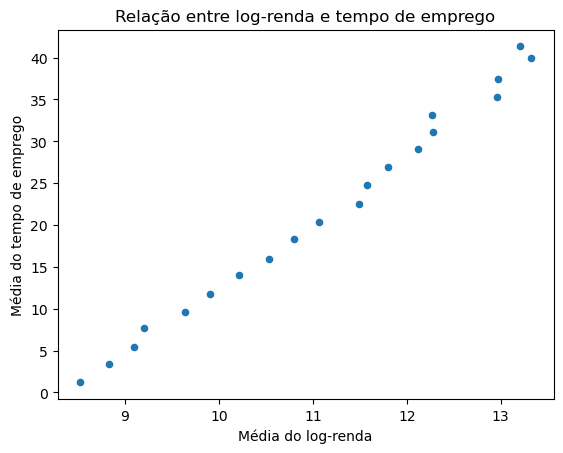

In [164]:
perfil.plot(x='Média log_renda', y='Média tempo_emprego', kind='scatter')
plt.xlabel('Média do log-renda')
plt.ylabel('Média do tempo de emprego')
plt.title('Relação entre log-renda e tempo de emprego')
plt.show()

RESPOSTA:

Ao observar o gráfico da média do tempo de emprego pela média do log-renda, podemos notar uma tendência positiva, indicando que, em geral, quanto maior o tempo de trabalho, maior é a renda média. Isso sugere uma relação positiva entre essas variáveis.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [167]:
#Usando a Regressão Segmentada:

X = dados_treinamento['tempo_emprego']
y = dados_treinamento['log_renda']


In [168]:
X = sm.add_constant(X)

In [169]:
model_seg = sm.OLS(y, X)
result_seg = model_seg.fit()

In [170]:
result_seg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                 4.016e+05
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:44:17   Log-Likelihood:            -7.3586e+05
No. Observations:              550000   AIC:                         1.472e+06
Df Residuals:                  549998   BIC:                         1.472e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.3395      0.002   4149.987      0.000       8.336       8.343
tempo_emprego     0.1291      0.000    633.688      0.000       0.129       0.129
==============================================================================
Omnibus:                      940.042   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              922.828
Skew:                          -0.089   Prob(JB):                    4.08e-201
Kurtosis:                       2.907   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

RESPOSTA:

R-Quadrado encontrado = 42,2%

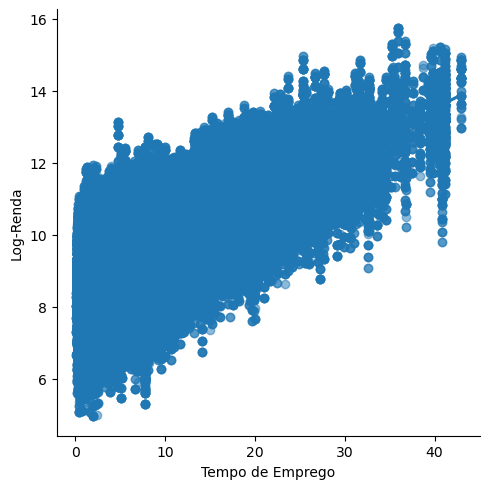

In [173]:
sns.lmplot(x='tempo_emprego', y='log_renda', data=dados_treinamento, ci=None, scatter_kws={'alpha': 0.5})
plt.xlabel('Tempo de Emprego')
plt.ylabel('Log-Renda')
plt.show()

In [175]:
#Usando o modelo LOWESS
lowess = sm.nonparametric.lowess(dados_treinamento['log_renda'], dados_treinamento['tempo_emprego'])

In [184]:
x_lowess = lowess[:, 0]
y_lowess = lowess[:, 1]

In [180]:
f = interp1d(x_lowess, y_lowess, bounds_error=False)

In [181]:
dados_treinamento['X_lowess'] = f(dados_treinamento['tempo_emprego'])

In [182]:
res = smf.ols('log_renda ~ X_lowess', data=dados_treinamento).fit()

In [185]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                 4.067e+05
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:46:26   Log-Likelihood:            -7.3436e+05
No. Observations:              550000   AIC:                         1.469e+06
Df Residuals:                  549998   BIC:                         1.469e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0136      0.015      0.927      0.354      -0.015       0.042
X_lowess       0.9969      0.002    637.766      0.000       0.994       1.000
==============================================================================
Omnibus:                      997.008   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              975.613
Skew:                          -0.090   Prob(JB):                    1.41e-212
Kurtosis:                       2.901   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

RESPOSTA:

R-Quadrado encontrado = 42,5%

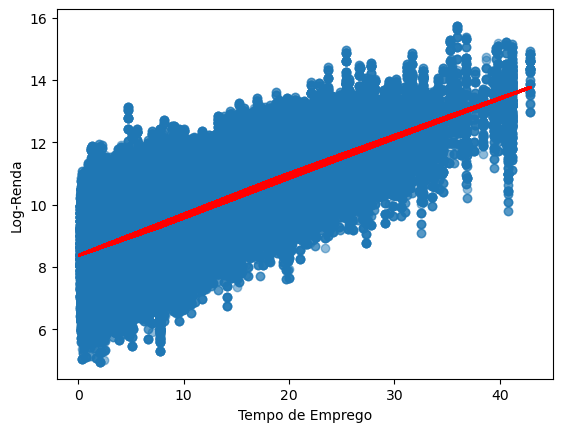

In [186]:
plt.scatter(dados_treinamento['tempo_emprego'], dados_treinamento['log_renda'], alpha=0.5)
plt.plot(dados_treinamento['tempo_emprego'], res.predict(), color='red', linewidth=2)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Log-Renda')
plt.show()

RESPOSTA:

Ao comparar os valores de R-quadrado obtidos nos diferentes modelos, podemos observar que houve um aumento progressivo no poder de explicação do modelo em relação à variável alvo (log-renda). O primeiro modelo, que utilizou várias variáveis, apresentou um R-quadrado de 31,1%. No entanto, ao aplicar a Regressão Segmentada, utilizando apenas a variável tempo_emprego, o R-quadrado aumentou para 42,2%. Da mesma forma, ao utilizar o método Lowess, também considerando somente a variável tempo_emprego, obteve-se um R-quadrado de 42,5%.